## Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years.

In this notebook , I am going to go through an example of machine learning project with the goal of predicting the probabilitiles that someone will experienece financial disttress in the next two years.

## 1. problem 

> How well we can predict the probability that someone may have experience fianancial distress in next two years

## 2. Data 

> The data is downloadded from kaggle Give me some credit competition:  
https://www.kaggle.com/competitions/GiveMeSomeCredit/data 


## 3. Evaluation 
> The evaluation metric for this competition is the AUC(Area Under Curve)
https://www.kaggle.com/competitions/GiveMeSomeCredit/overview/evaluation

## 4. Features 

> Kaggle provides data dictionary deatiling all of the fetures of the dataset. You can view this dictionary on google sheets: https://www.kaggle.com/competitions/GiveMeSomeCredit/data?select=Data+Dictionary.xls 
  
About the various columns: 
* SeriousDlqin2yrs: target columns ( we are interested about) 
* RevolvingUtilizationOfUnsecuredLines (Rest all columns below, are useful for feature engineering)
* age
* NumberOfTime30-59DaysPastDueNotWorse
* DebtRatio
* MonthlyIncome
* NumberOfOpenCreditLinesAndLoans
* NumberOfTimes90DaysLate
* NumberRealEstateLoansOrLines
* NumberOfTime60-89DaysPastDueNotWorse
* NumberOfDependents


## Prepaeraing the tools 

we are goning to use pandas,numpy ,matplotlib for data analysis and manipulation and sklearn for data modeling 



In [20]:
# Regular EDA(exploratory data analysis) and plotting librariesimport pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns

# we want our plot to apear inside this notebook 
%matplotlib inline 


# Models from scikit-Leran
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import plot_roc_curve


## Load Training Data 

In [2]:
# Import traing data 
df=pd.read_csv("data/cs-training.csv",low_memory=False,index_col=0)   # Remove column no 1 

## Data Exploration(Exploratory Data Analysis)

The goal here is to find out more about the data and become a subject matter expert on the data set you are working with.

* what questios are you trying to solve ?
* what kind of data do we have and how do we treat different types?
* what's missing from the data and how do you deal with it ?
* Where are the outliers and why should you care about them ?
* How can you add,change or remove features to get more out of you data?

In [3]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [4]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
df.shape  # we have 150000 rows and 11 columns, 1 colaum is target columns, rest 10 columns are features 

(150000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [7]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [8]:
df.isna().sum()   # Monthly income and number of dependants ,these two columns are not numerical ones, it has missing values 

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [9]:
df.columns


Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [10]:
df["SeriousDlqin2yrs"].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [11]:
df.nunique()

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

In [12]:
df["SeriousDlqin2yrs"].value_counts()


0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

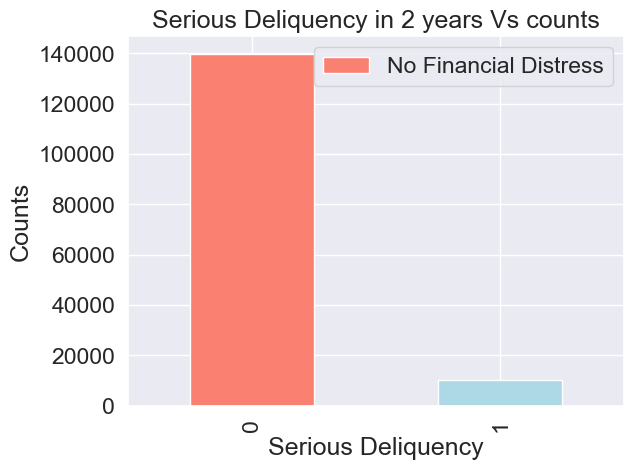

In [147]:
df["SeriousDlqin2yrs"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

# Add some communications 
plt.title("Serious Deliquency in 2 years Vs counts")
plt.xlabel("Serious Deliquency")
plt.ylabel("Counts")
plt.legend(["No Financial Distress","Financial Distress"]);



In [14]:
df["SeriousDlqin2yrs"].value_counts()/df.shape[0]

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64

In [145]:
#df.SeriousDlqin2yrs.value_counts()/df.shape[0].plot(kind="pie",color=["salmon","lightblue"])

In [16]:
# make a correlation matrix 
df.corr()    #which compares each of the columns to each others 

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
RevolvingUtilizationOfUnsecuredLines,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
NumberOfTime30-59DaysPastDueNotWorse,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
DebtRatio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
MonthlyIncome,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
NumberOfTimes90DaysLate,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
NumberRealEstateLoansOrLines,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684
NumberOfTime60-89DaysPastDueNotWorse,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922


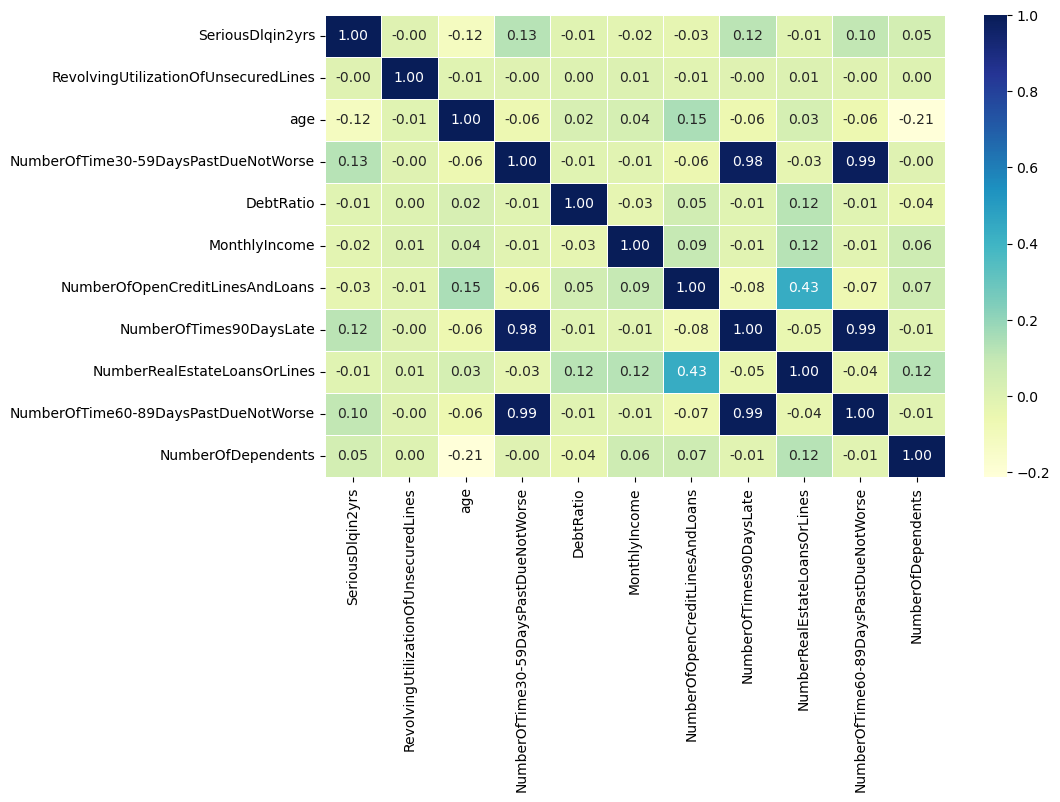

In [23]:
# Lets Make corelation matrix little bit prettier 
corr_matrix=df.corr()

fig,ax=plt.subplots(figsize=(10,6))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

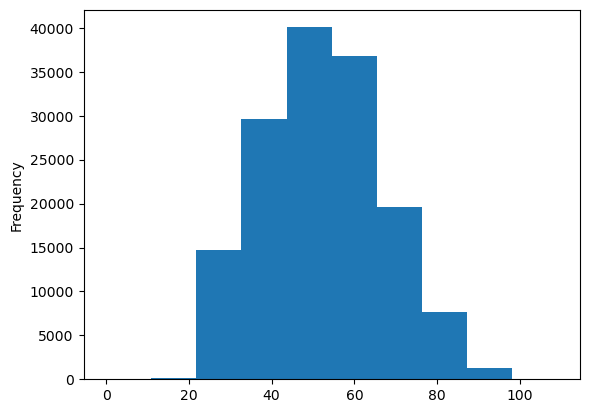

In [25]:
## Hisogram of age column 
df.age.plot.hist();

In [26]:
#comparision of age Vs Deliquency rate using pandas's crosstab  
pd.crosstab(df.age,df.SeriousDlqin2yrs)

SeriousDlqin2yrs,0,1
age,,
0,1,0
21,170,13
22,398,36
23,571,70
24,718,98
...,...,...
102,3,0
103,3,0
105,1,0


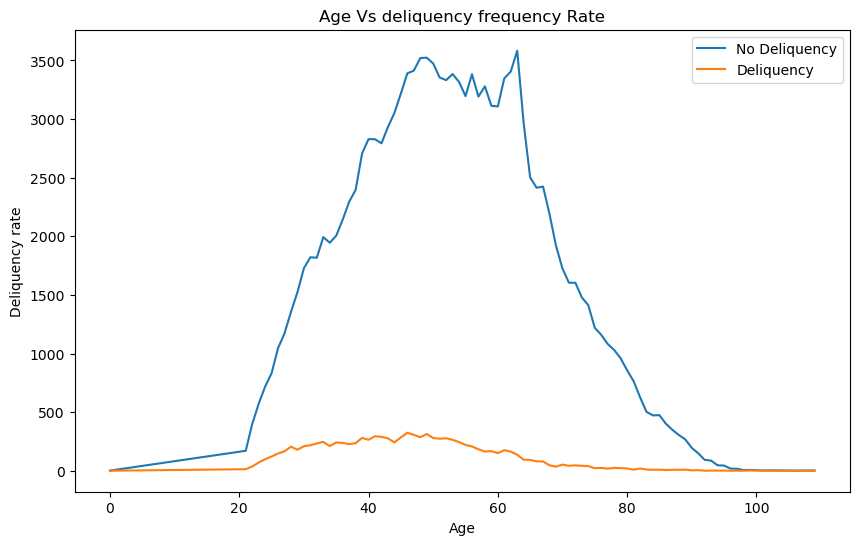

In [35]:
#Line graph of age Vs Deliquency rate 
pd.crosstab(df.age,df.SeriousDlqin2yrs).plot(kind="line",figsize=(10,6))

# Add some communications 
plt.title("Age Vs deliquency frequency Rate")
plt.xlabel("Age")
plt.ylabel("Deliquency rate")
plt.legend(["No Deliquency","Deliquency"]);

In [148]:
# fig,ax=plt.subplots(1,2)
# subplots.distplot(df.NumberOfDependents,ax=ax[0])
# sb.distplot(df.MonthlyIncome,ax=ax[1])
# ax[1,1].plot()

In [149]:
## fill Missing values 
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SeriousDlqin2yrs
RevolvingUtilizationOfUnsecuredLines
age
NumberOfTime30-59DaysPastDueNotWorse
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents


In [40]:
# Check for which numerics columns have missing values.
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MonthlyIncome
NumberOfDependents


In [42]:
# Fill numeric rows witth median 
for label,content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Fill  missing numerics values with median
            df[label]=content.fillna(content.median())
            
        


In [43]:
df.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

## Modeling using sklearn

In [44]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [45]:
# Split the traing data into features and label(x and y)
x=df.drop("SeriousDlqin2yrs",axis=1)
y=df["SeriousDlqin2yrs"]

In [ ]:
#Lets add ID columns as first one as we dropped it intially but it mjght be helpful to know about deatails of each person using distinct IDs


In [46]:
x

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149996,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0
149999,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [47]:
y

1         1
2         0
3         0
4         0
5         0
         ..
149996    0
149997    0
149998    0
149999    0
150000    0
Name: SeriousDlqin2yrs, Length: 150000, dtype: int64

In [48]:
# Split the data into traing and test set
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:
x_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
104026,0.000000,29,0,0.011513,4342.0,5,0,0,0,0.0
5416,0.595526,55,0,0.835333,1833.0,11,0,1,0,0.0
75613,0.000000,43,0,0.043437,4166.0,2,0,0,0,4.0
138170,0.391980,40,0,0.059771,9000.0,2,0,0,0,5.0
87185,0.000000,35,0,0.133598,5800.0,12,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
119880,0.107445,72,0,0.899275,4000.0,17,0,2,0,1.0
103695,0.087697,67,1,1781.000000,5400.0,10,0,1,0,1.0
131933,0.068788,49,0,0.673331,2800.0,8,0,2,0,0.0
146868,0.219630,36,0,0.025316,1500.0,2,0,0,0,0.0


In [50]:
x_test

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
59771,0.029690,57,0,0.283244,10121.0,7,0,1,0,0.0
21363,0.000000,57,0,0.142562,7750.0,9,0,1,0,0.0
127325,0.036569,48,0,0.236294,6000.0,6,0,2,0,3.0
140510,1.018331,41,0,0.163138,4958.0,4,0,0,0,0.0
144298,1.008799,49,0,3942.000000,5400.0,10,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
30431,1.000000,60,0,3.000000,5400.0,0,0,0,0,0.0
63245,0.053164,82,0,0.263518,2773.0,9,0,1,0,0.0
104971,0.967086,35,0,0.469314,3600.0,3,0,1,0,0.0
53961,0.013522,62,0,0.257847,10098.0,12,0,2,0,0.0


In [51]:
len(x_train),len(x_test),len(y_train),len(y_test)

(120000, 30000, 120000, 30000)

In [53]:
# Now we have split our data into train and test set so its time to build a machine learning model. we will train it(find the patterns on the traing sets) and we ll test(use the trained patterns) on test data to find the probability of deliqunecy rate 
# Here, we are going to use Logistic Regression() and RandomForestClassifier()model as our problem falls in this category, we have to predict if someone has a deliquency rate or not ? 

In [63]:
# Its good idea to put these two models in disctionary to avoid repeating all steps 
models={"Logistic Regression": LogisticRegression(),
      "Random Forest Classifier": RandomForestClassifier()}

# Create a funstion to fit and score a model 
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluate given machine learning models.
    models: a dictionary of diffetrent scikit-learn machine learining models
    x_train: Training data(no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: test labels 
    """
    #set Random seed 
    np.random.seed(42)
    
    # Make a dictionary to keep model score
    model_scores={}
        
    # loop through the model
    for name,model in models.items():
        # Fit the model to the data
        model.fit(x_train,y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(x_test,y_test)
        
    # Return model scores 
    return model_scores

In [64]:
model_scores=fit_and_score(models=models,
                          x_train=x_train,
                          x_test=x_test,
                          y_train=y_train,
                          y_test=y_test)
model_scores

C:\Users\sheth\Desktop\ml-course\GiveMeSomeCredit\.env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9346, 'Random Forest Classifier': 0.9364333333333333}

In [65]:
# comparision of these two models
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare

,Logistic Regression,Random Forest Classifier
accuracy,0.9346,0.936433


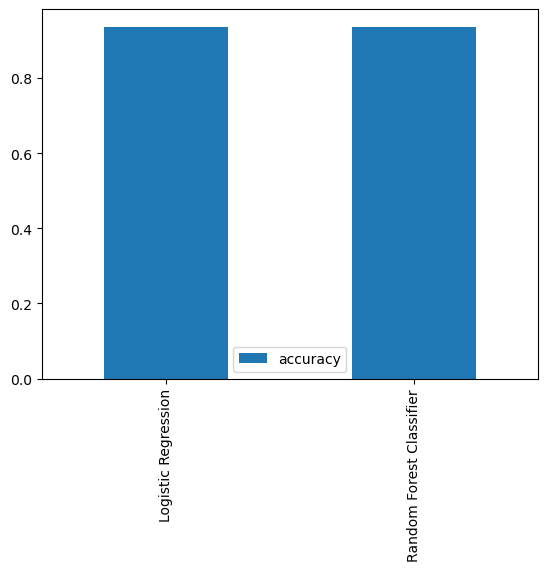

In [68]:
model_compare.T.plot.bar();


# Now we have got our base model and both these model perfomed quite good 
# Lets look at the followings:
* Hyperpasrameter tunning 
* confusion matrix
* ROC 
* AUC 




## Hyperparameter Tunning with RandomizedSearchCV()

we are going to Tune:
* LogisticRegression()
* RandomForestClassifier()  
.....using RandomizedSearchCV 

In [70]:
# creat a hyperparameter grid for LogisticRegression 
log_reg_grid={"C":np.logspace(-4,4,50),
             "solver":["liblinear"]}

# Create a hyperparameter grif for RandomForestClassifier()
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}


In [71]:
# Now we have grid setup for our model, lets Tune using REandomizedSearchCV()


In [74]:
# Tune Logistic Regression 
np.random.seed(42)

#Set up Randomized Hyperparametres fro Logistic Regression()
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
# Fit Random hyperparameter serach model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-0...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [75]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.2067926406393288}

In [76]:
rs_log_reg.score(x_test,y_test)

0.9345666666666667

In [77]:
#set up random seed
np.random.seed(42)

#setup random hyperparameters search for RandomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)
# Fit Random hyperparamerter serch model for RandomForestClassifier()
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [80]:
#Find the best paramaterters 
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [81]:
#Evaluate the RandomizedSearch RandomForestClassifier model 
rs_rf.score(x_test,y_test)

0.9391

In [82]:
#We are not going to use GridSerachCV() method to tune our hyperparameter as it is exhaustavely serach all possible combinations to find patterns, and it will usually takes longer time, so I am skipping this part, but if you want to use it then you can use it using same method we followved for RandomizedSearchCV()

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC Curve and AUC score 
* Confusion matrix
* Classification Report

In [83]:
# make predictions with tuned model
y_preds=rs_log_reg.predict(x_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
y_test

59771     0
21363     0
127325    0
140510    0
144298    0
         ..
30431     0
63245     0
104971    0
53961     0
49316     0
Name: SeriousDlqin2yrs, Length: 30000, dtype: int64

C:\Users\sheth\Desktop\ml-course\GiveMeSomeCredit\.env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


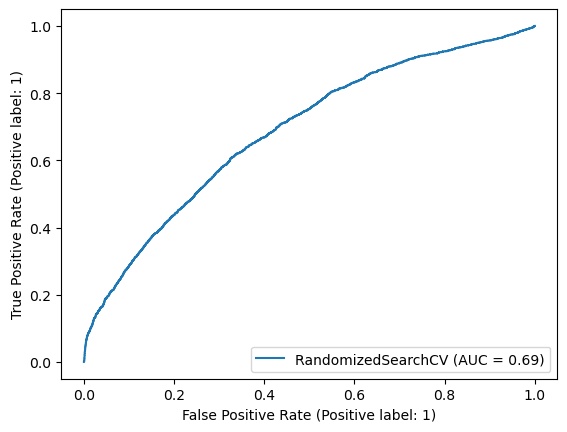

In [85]:
#Import ROC curve function from sklearn.matrics,but we have already imporoted initially 

#Plot ROC curve and calculate AUC matrix
plot_roc_curve(rs_log_reg,x_test,y_test)

In [86]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[28014    30]
 [ 1933    23]]


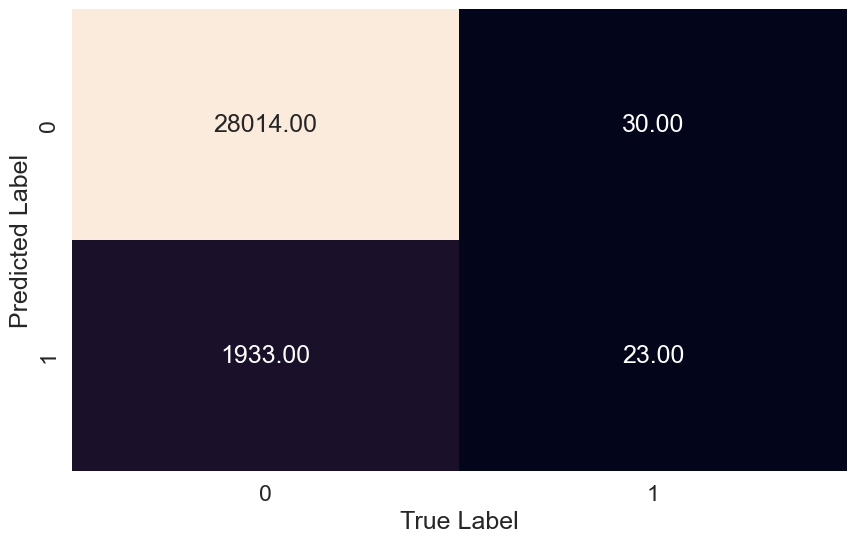

In [89]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax=plt.subplots(figsize=(10,6))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False,
                  fmt=".2f")
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
        
plot_conf_mat(y_test,y_preds)

In [90]:
print(classification_report(y_test,y_preds))    # it been done on test data ,not included cross validation score 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     28044
           1       0.43      0.01      0.02      1956

    accuracy                           0.93     30000
   macro avg       0.68      0.51      0.49     30000
weighted avg       0.90      0.93      0.90     30000



## Make Predictions on test Data

In [93]:
# Import the test data  
df_test=pd.read_csv("data/cs-test.csv",low_memory=False,index_col=0)


In [94]:
df_test

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [ ]:
# I want to drop Serious Deliquency in 2 year, fisrt column from our test data as we are going top predict its probabilities 
df_test.drop("SeriousDlqin2yrs")

In [95]:
df_test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [96]:
df_test.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [98]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

In [99]:
df_test.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

## Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [100]:
# Check for which numerics columns have missing values.
for label,content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

SeriousDlqin2yrs
MonthlyIncome
NumberOfDependents


In [102]:
# Fill numeric rows witth median 
for label,content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
        
            #Fill  missing numerics values with median
            df_test[label]=content.fillna(content.median())

In [103]:
#Check if there is any missnig numerical values 
df_test.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

In [106]:
#Test Data set is ready to fit in our deifined model 
xt=df_test.drop("SeriousDlqin2yrs",axis=1)
yt=df_test

In [115]:
test_preds=rs_log_reg.predict(xt)
test_preds                       #probabilities of O and 1 for deliquency. 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
test_probabilities=rs_log_reg.predict_proba(xt)[:, 1]
test_probabilities                 #probabilities in numbers using predict_proba function 

array([0.07705725, 0.04418363, 0.04129485, ..., 0.0246146 , 0.03376054,
       0.11318096])

In [141]:
pd.Series(test_probabilities)  # To convert it into columns 

0         0.077057
1         0.044184
2         0.041295
3         0.154344
4         0.166034
            ...   
101498    0.190249
101499    0.287188
101500    0.024615
101501    0.033761
101502    0.113181
Length: 101503, dtype: float64

In [143]:
predicted=pd.DataFrame({"ID":np.arange(1,101504),"Probability":pd.Series(test_probabilities)})


In [144]:
#  Save result file 
predicted.to_csv("Hardik_submission.csv",index=False)